## Real-World Mobility Data Analysis

#### Analyzing latent factors with time series plots and spatial plots

In [48]:
# Import packages
import math
import pandas as pd
import geopandas as gpd
import numpy as np
import numpy.random

import scipy.io as sio
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import matplotlib.dates as mdates

from shapely.geometry import box
import tensorly as tl
import fiona
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [49]:
# Packages for spatial plots
#import osmnx as ox
import contextily as cx
import mercantile

In [50]:
# Import factor matrices from MATLAB
fmat1 = sio.loadmat('Matlab_fmat1.mat')['fmat1']
fmat2 = sio.loadmat('Matlab_fmat2.mat')['fmat2']
fmat3 = sio.loadmat('Matlab_fmat3.mat')['fmat3']
fmat4 = sio.loadmat('Matlab_fmat4.mat')['fmat4']

In [51]:
# Import data
df_path = "counts_merged.csv"
df = pd.read_csv(df_path)

In [52]:
# Create cbg_reference_list for GEOID
cbg_reference_list = df.loc[:, ('poi_cbg','dist_to_fire_m', 'poi_cnt', 'pop2019')]
cbg_reference_list = cbg_reference_list.drop_duplicates().reset_index()

cbg_key = cbg_reference_list.to_dict()["poi_cbg"]
for i in range(0, len(cbg_reference_list)):
    cbg_reference_list.at[i,'poi_cbg'] = "0" + str(cbg_reference_list.at[i,'poi_cbg'])
cbg_reference_list = cbg_reference_list.rename(columns={"poi_cbg": "GEOID"})

In [53]:
# Spatial componet = factor matrix 1
factors_df = pd.DataFrame(fmat1, columns = ['factor 1','factor 2','factor 3','factor 4'])
i = [np.nan] * len(factors_df)
factors_df.insert(0, "poi_cbg", i)
for i in range(0, len(factors_df)):
    factors_df.at[i,'poi_cbg'] = "0" + str(cbg_key[i])
factors_df = factors_df.rename(columns={"poi_cbg": "GEOID"})
factors_df = factors_df.set_index('GEOID')
factors_df = factors_df.merge(cbg_reference_list, on = 'GEOID')

In [54]:
geo_df = gpd.read_file('la_fire_cbg_30000m.geojson', dtype={'GEOID':'str'})
merged_df = geo_df.merge(factors_df, on='GEOID')
# merged_df contains all the fmat1 and geographic data

#### Time Series Plots (fmat2)


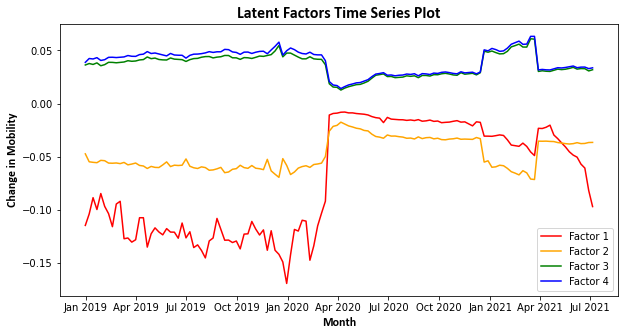

In [55]:
# Time series plot of all 4 latent factors

dates = df.loc[0:130,"dt"]
dates = pd.to_datetime(dates)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(dates,fmat2[:, 0], color='red')
ax.plot(dates,fmat2[:, 1], color='orange')
ax.plot(dates,fmat2[:, 2], color='green')
ax.plot(dates,fmat2[:, 3], color='blue')

ax.legend(["Factor 1", "Factor 2", "Factor 3", "Factor 4"])

# formatting x axis
date_form = mdates.DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)

plt.title("Latent Factors Time Series Plot", fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Month', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Change in Mobility', fontname="Calibri", size=12, fontweight="bold")

#plt.savefig('factorsAll_timeseries.png', dpi=1200)

#### Individual latent factors (Jan - Dec)
- Plot 3 shades (dark 2019 - light 2021)

In [56]:
# Break up fmat into 3 segments with weeks as index (0-52) for all factors

df_fac_all = pd.DataFrame(fmat2, columns = ('fac1', 'fac2', 'fac3', 'fac4'))

# break up by week #, reset index so it aligns
df_fac2019 = df_fac_all.iloc[0:53,:]
df_fac2019 = df_fac2019.reset_index()
df_fac2020 = df_fac_all.iloc[53:104, :]
df_fac2020 = df_fac2020.reset_index()
df_fac2021 = df_fac_all.iloc[104:130,:]
df_fac2021 = df_fac2021.reset_index()

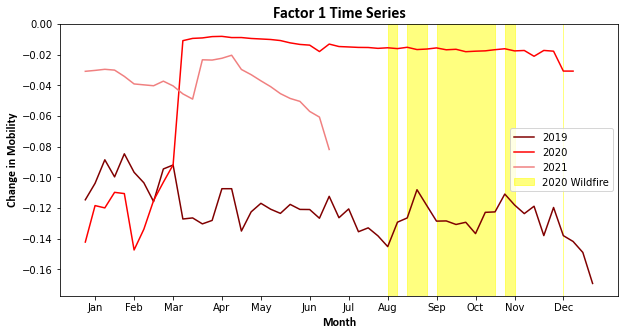

In [57]:
# Factor 1

# plot fac1 for the three years
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(df_fac2019['fac1'], color='maroon', label = '2019')
ax.plot(df_fac2020['fac1'], color='red', label = '2020')
ax.plot(df_fac2021['fac1'], color='lightcoral', label = '2021')

# ticks and labels
month_starts = [1,5,9,14,18,23,27,31,36,40,44,49]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

# Wildfire highlighting - all in 2020 late summer - fall
ax.axvspan(43, 44, alpha=0.5, color='yellow', label = '2020 Wildfire')
ax.axvspan(31, 32, alpha=0.5, color='yellow')
ax.axvspan(36, 42, alpha=0.5, color='yellow')
ax.axvspan(33, 35, alpha=0.5, color='yellow')
ax.axvspan(49, 49, alpha=0.5, color='yellow')

# titles and labels and legends
plt.title('Factor 1 Time Series', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Month', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Change in Mobility', fontname="Calibri", size=12, fontweight="bold")
plt.legend()

#plt.savefig('factor1-timeseries.png', dpi=1200)

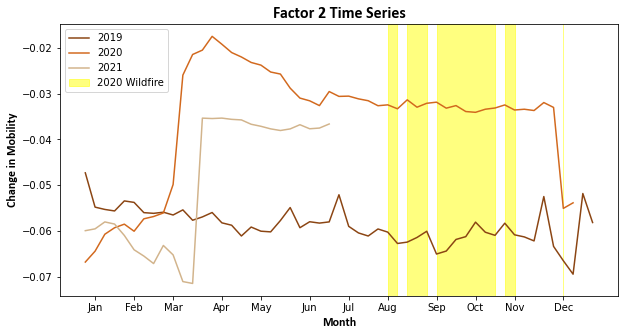

In [58]:
# Factor 2

# plot fac2 for the three years
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(df_fac2019['fac2'], color='saddlebrown', label = '2019')
ax.plot(df_fac2020['fac2'], color='chocolate', label = '2020')
ax.plot(df_fac2021['fac2'], color='tan', label = '2021')

# ticks and labels
month_starts = [1,5,9,14,18,23,27,31,36,40,44,49]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

# Wildfire highlighting - all in 2020 late summer - fall
ax.axvspan(43, 44, alpha=0.5, color='yellow', label = '2020 Wildfire')
ax.axvspan(31, 32, alpha=0.5, color='yellow')
ax.axvspan(36, 42, alpha=0.5, color='yellow')
ax.axvspan(33, 35, alpha=0.5, color='yellow')
ax.axvspan(49, 49, alpha=0.5, color='yellow')

# titles and labels and legends
plt.title('Factor 2 Time Series', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Month', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Change in Mobility', fontname="Calibri", size=12, fontweight="bold")
plt.legend()

#plt.savefig('factor2-timeseries.png', dpi=1200)

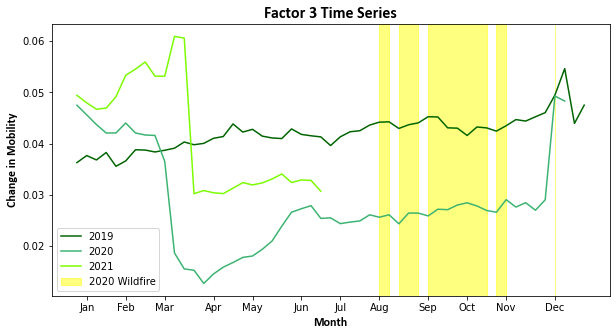

In [59]:
# Factor 3

# plot fac3 for the three years
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(df_fac2019['fac3'], color='darkgreen', label = '2019')
ax.plot(df_fac2020['fac3'], color='mediumseagreen', label = '2020')
ax.plot(df_fac2021['fac3'], color='lawngreen', label = '2021')

# ticks and labels
month_starts = [1,5,9,14,18,23,27,31,36,40,44,49]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

# Wildfire highlighting - all in 2020 late summer - fall
ax.axvspan(43, 44, alpha=0.5, color='yellow', label = '2020 Wildfire')
ax.axvspan(31, 32, alpha=0.5, color='yellow')
ax.axvspan(36, 42, alpha=0.5, color='yellow')
ax.axvspan(33, 35, alpha=0.5, color='yellow')
ax.axvspan(49, 49, alpha=0.5, color='yellow')

# titles and labels and legends
plt.title('Factor 3 Time Series', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Month', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Change in Mobility', fontname="Calibri", size=12, fontweight="bold")
plt.legend()

#plt.savefig('factor3-timeseries.png', dpi=1200)

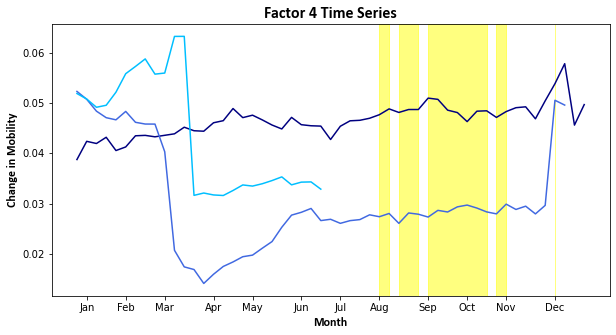

In [60]:
# Factor 4

# plot fac4 for the three years
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(df_fac2019['fac4'], color='navy', label = '2019')
ax.plot(df_fac2020['fac4'], color='royalblue', label = '2020')
ax.plot(df_fac2021['fac4'], color='deepskyblue', label = '2021')

# ticks and labels
month_starts = [1,5,9,14,18,23,27,31,36,40,44,49]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec'] 
ax.set_xticks(month_starts)
ax.set_xticklabels(month_names)

# Wildfire highlighting - all in 2020 late summer - fall
ax.axvspan(43, 44, alpha=0.5, color='yellow', label = '2020 Wildfire')
ax.axvspan(31, 32, alpha=0.5, color='yellow')
ax.axvspan(36, 42, alpha=0.5, color='yellow')
ax.axvspan(33, 35, alpha=0.5, color='yellow')
ax.axvspan(49, 49, alpha=0.5, color='yellow')

# titles and labels and legends
plt.title('Factor 4 Time Series', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Month', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Change in Mobility', fontname="Calibri", size=12, fontweight="bold")

#plt.savefig('factor4-timeseries.png', dpi=1200)

#### Spatial plots (fmat1)

In [61]:
# Add study area boundary and fires
fires_area_df = gpd.read_file('la_fires_2020_4326.geojson')
area_bound_df = gpd.read_file('study_area_boundary.geojson')
fires_area_large_df = fires_area_df.loc[fires_area_df['GIS_ACRES'] > 6600]

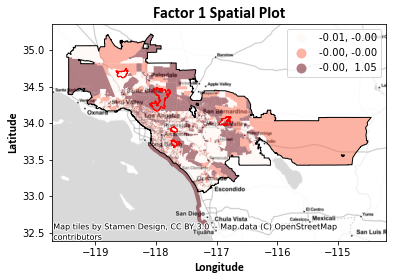

In [62]:
# Factor 1
ax1 = merged_df.plot(column='factor 1', scheme='quantiles', k=3, cmap='Reds', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax1, crs=merged_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Factor 1 Spatial Plot', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Longitude', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Latitude', fontname="Calibri", size=12, fontweight="bold")

ax1 = fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax1)
ax1 = area_bound_df.plot(color='None', ax=ax1)

#plt.savefig('factor1-basemap.png', dpi=1200)

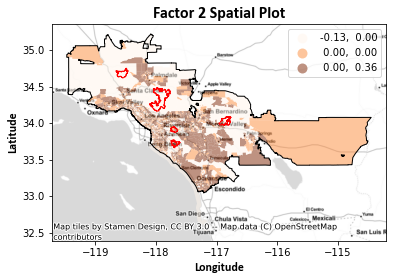

In [63]:
# Factor 2
ax2 = merged_df.plot(column='factor 2', scheme='quantiles', k=3, cmap='Oranges', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax2, crs=merged_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Factor 2 Spatial Plot', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Longitude', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Latitude', fontname="Calibri", size=12, fontweight="bold")

fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax2)
area_bound_df.plot(color='None', ax=ax2)

#plt.savefig('factor2-basemap.png', dpi=1200)

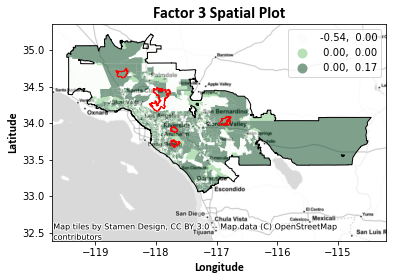

In [66]:
# Factor 3
ax3 = merged_df.plot(column='factor 3', scheme='quantiles', k=3, cmap='Greens', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax3, crs=merged_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Factor 3 Spatial Plot', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Longitude', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Latitude', fontname="Calibri", size=12, fontweight="bold")

fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax3)
area_bound_df.plot(color='None', ax=ax3)

#plt.savefig('factor3-basemap.png', dpi=1200)

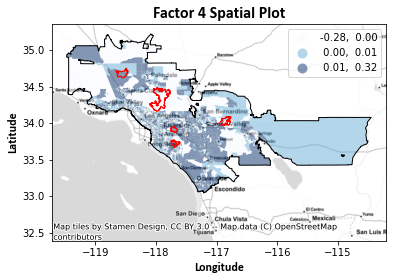

In [65]:
# Factor 4
ax4 = merged_df.plot(column='factor 4', scheme='quantiles', k=3, cmap='Blues', edgecolor='w', 
                     legend=True, linewidth = 0, alpha=.5)
cx.add_basemap(ax4, crs=merged_df.crs.to_string(), source=cx.providers.Stamen.TonerLite)
plt.title('Factor 4 Spatial Plot', fontname="Calibri", size=16, fontweight="bold")
plt.xlabel('Longitude', fontname="Calibri", size=12, fontweight="bold")
plt.ylabel('Latitude', fontname="Calibri", size=12, fontweight="bold")

fires_area_large_df.plot(color='None', edgecolor='red', linewidth=1, ax=ax4)
area_bound_df.plot(color='None', ax=ax4)

#plt.savefig('factor4-basemap.png', dpi=1200)